In [1]:
import warnings
import os
os.chdir(f'/mnt/primary/exposure-fairness/')
import config
warnings.filterwarnings('ignore')
import pyterrier as pt
if not pt.started():
    pt.init()

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 100)
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

Java started and loaded: pyterrier.java, pyterrier.terrier.java [version=5.11 (build: craig.macdonald 2025-01-13 21:29), helper_version=0.0.8]


In [2]:
# bm25 = df[(df['modelname'] == 'bm25') & (df['threshold'] == 0)]
# gini_bm25 = df.loc[df['Model'] == 'BM25',['Gini','Gini.1','Gini.2','Gini.3']]

In [3]:
# grouped_df = df2.groupby('modelname')
# grouped_df.get_group(('bm25',500))

In [24]:
def sub_plot(plt,title,col, ylabel, km=None):
    # bm25 = df[(df['modelname'] == 'bm25') & (df['threshold'] == threshold)]
    # bm25_monot5 = df[(df['modelname'] == 'bm25_monot5') & (df['threshold'] == threshold)]
    # splade = df[(df['modelname'] == 'splade') & (df['threshold'] == threshold)]
    # tctcolbert = df[(df['modelname'] == 'tctcolbert') & (df['threshold'] == threshold)]
    # bm25_tctcolbert = df[(df['modelname'] == 'bm25_tctcolbert') & (df['threshold'] == threshold)]

    modelname = "bm25"
    result_csv_path = f'{config.data_dir}/v3/{modelname}_{config.dataset_name}_{config.topics_name}_{config.retrieve_num}_models_granularities_{km}.csv'
    bm25 = pd.read_csv(result_csv_path, index_col=0).reset_index()

    modelname = "splade"
    result_csv_path = f'{config.data_dir}/v3/{modelname}_{config.dataset_name}_{config.topics_name}_{config.retrieve_num}_models_granularities_{km}.csv'
    splade = pd.read_csv(result_csv_path, index_col=0).reset_index()

    modelname = "tctcolbert"
    result_csv_path = f'{config.data_dir}/v3/{modelname}_{config.dataset_name}_{config.topics_name}_{config.retrieve_num}_models_granularities_{km}.csv'
    tctcolbert = pd.read_csv(result_csv_path, index_col=0).reset_index()

    modelname = "bm25_tctcolbert"
    result_csv_path = f'{config.data_dir}/v3/{modelname}_{config.dataset_name}_{config.topics_name}_{config.retrieve_num}_models_granularities_{km}.csv'
    bm25_tctcolbert = pd.read_csv(result_csv_path, index_col=0).reset_index()

    modelname = "bm25_monot5"
    result_csv_path = f'{config.data_dir}/v3/{modelname}_{config.dataset_name}_{config.topics_name}_{config.retrieve_num}_models_granularities_{km}.csv'
    bm25_monot5 = pd.read_csv(result_csv_path, index_col=0).reset_index()

    x = [1,2,3,4,5]
    # col = 'min_gini'
    y = bm25[col]
    line1, = plt.plot(x,y,label='BM25', marker='.')
    y = splade[col]
    line2, = plt.plot(x,y,label='SPLADE', marker='.')
    y = tctcolbert[col]
    line3, = plt.plot(x,y,label='TCT-ColBERT', marker='.')
    y = bm25_tctcolbert[col]
    line4, = plt.plot(x,y,label='BM25>>TCT-ColBERT', marker='.')
    y = bm25_monot5[col]
    line5, = plt.plot(x,y,label='BM25>>Mono-T5', marker='.')

    # plt.set_title('Exposure Fairness')
    plt.set_title(title, fontsize=16)
    plt.set_xlabel(r'#Groups ($K$)', fontsize=16)
    
    plt.set_ylabel(ylabel, fontsize=16)
    plt.set_xticks(ticks = x, labels = ['500', '1000', '2000', '5000', '10000'], fontsize=16)
    # plt.set_yticks(ticks = y, labels = [f'{i:.2f}' for i in y])
    return line1, line2,line3,line4,line5

In [25]:
# fig, (ax0,ax1,ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
# # plt.subplots_adjust(hspace=1, wspace=0.2, left=0.1)
# plt.subplots_adjust(hspace=1, wspace=0.2, left=0, right=1, bottom=0)

# ylabel = 'Minimal (Gini), Average (Gini), Maximum (Gini)'
# km = 'faiss'
# col = 'min_gini'
# ax0.xaxis.set_major_locator(MultipleLocator(1))
# ax0.yaxis.set_major_locator(MultipleLocator(0.03))
# # ax0.set_xlim(1,5)
# ax0.set_ylim(0.135,0.21)
# g0 = sub_plot(ax0,None,col, ylabel,km=km)

# col = 'mean_gini'
# ax1.xaxis.set_major_locator(MultipleLocator(1))
# ax1.yaxis.set_major_locator(MultipleLocator(0.03))
# # ax1.set_xlim(1,5)
# ax1.set_ylim(0.23,0.315)
# g1 = sub_plot(ax1,None,col, ylabel,km=km)

# col = 'max_gini'
# ax2.xaxis.set_major_locator(MultipleLocator(1))
# ax2.yaxis.set_major_locator(MultipleLocator(0.05))
# # ax2.set_xlim(1,5)
# ax2.set_ylim(0.48,0.77)
# g2 = sub_plot(ax2,None,col, ylabel,km=km)

# g = list(g0 + g1 + g2)

# fig.legend(handles=g0, loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=10, fontsize=16)
# plt.savefig(f'{config.prog_dir}/aggr_gini_{km}.pdf', format="pdf", bbox_inches="tight", pad_inches=0)
# plt.show()

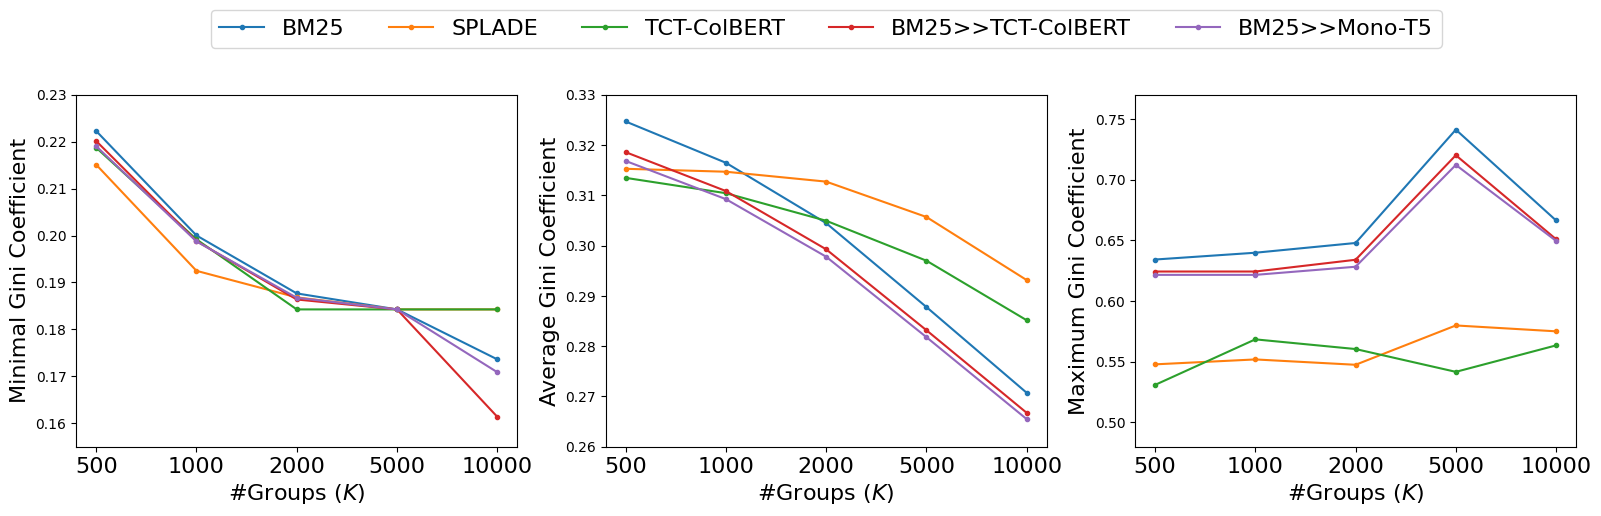

In [36]:
km = 'scikit_dense'

fig, (ax0,ax1,ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
# plt.subplots_adjust(hspace=1, wspace=0.2, left=0.1)
plt.subplots_adjust(hspace=1, wspace=0.2, left=0, right=1, bottom=0)

col = 'min_gini'
ylabel = 'Minimal Gini Coefficient'
ax0.xaxis.set_major_locator(MultipleLocator(1))
ax0.yaxis.set_major_locator(MultipleLocator(0.01))
# ax0.set_xlim(1,5)
ax0.set_ylim(0.155,0.23)
g0 = sub_plot(ax0,None,col, ylabel,km=km)

col = 'mean_gini'
ylabel = 'Average Gini Coefficient'
ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.yaxis.set_major_locator(MultipleLocator(0.01))
# ax1.set_xlim(1,5)
ax1.set_ylim(0.26,0.33)
g1 = sub_plot(ax1,None,col, ylabel,km=km)

col = 'max_gini'
ylabel = 'Maximum Gini Coefficient'
ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.yaxis.set_major_locator(MultipleLocator(0.05))
# ax2.set_xlim(1,5)
ax2.set_ylim(0.48,0.77)
g2 = sub_plot(ax2,None,col, ylabel,km=km)

g = list(g0 + g1 + g2)

fig.legend(handles=g0, loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=10, fontsize=16)
plt.savefig(f'{config.prog_dir}/aggr_gini_{km}.pdf', format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()

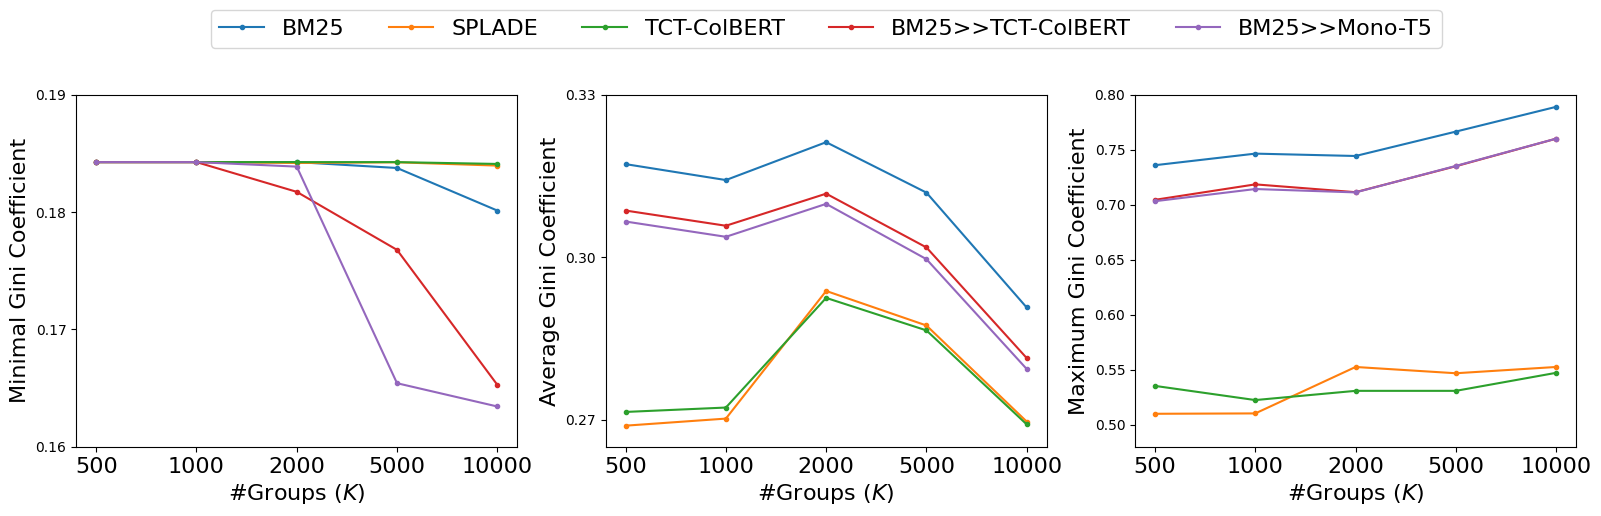

In [37]:
km = 'scikit_tfidf'

fig, (ax0,ax1,ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
# plt.subplots_adjust(hspace=1, wspace=0.2, left=0.1)
plt.subplots_adjust(hspace=1, wspace=0.2, left=0, right=1, bottom=0)

col = 'min_gini'
ylabel = 'Minimal Gini Coefficient'
ax0.xaxis.set_major_locator(MultipleLocator(1))
ax0.yaxis.set_major_locator(MultipleLocator(0.01))
# ax0.set_xlim(1,5)
ax0.set_ylim(0.16,0.19)
g0 = sub_plot(ax0,None,col, ylabel,km=km)

col = 'mean_gini'
ylabel = 'Average Gini Coefficient'
ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.yaxis.set_major_locator(MultipleLocator(0.03))
# ax1.set_xlim(1,5)
ax1.set_ylim(0.265,0.33)
g1 = sub_plot(ax1,None,col, ylabel,km=km)

col = 'max_gini'
ylabel = 'Maximum Gini Coefficient'
ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.yaxis.set_major_locator(MultipleLocator(0.05))
# ax2.set_xlim(1,5)
ax2.set_ylim(0.48,0.80)
g2 = sub_plot(ax2,None,col, ylabel,km=km)

g = list(g0 + g1 + g2)

fig.legend(handles=g0, loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=10, fontsize=16)
plt.savefig(f'{config.prog_dir}/aggr_gini_{km}.pdf', format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()